In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tsfel
# from typing import Literal, Union

X_train = np.load("../Datasets/RawAccelerometer Data/X_train.npy")
X_test = np.load("../Datasets/RawAccelerometer Data/X_test.npy")
y_train = np.load("../Datasets/RawAccelerometer Data/y_train.npy")
y_test = np.load("../Datasets/RawAccelerometer Data/y_test.npy")

display(X_train)
display(y_train)
display(np.unique(y_train))
print(X_train.shape,y_train.shape)


array([[[ 1.19648   , -0.1606898 , -0.740178  ],
        [ 1.22203   , -0.2672951 , -0.7717485 ],
        [ 1.22311   , -0.4338634 , -0.7678422 ],
        ...,
        [ 0.4974957 , -0.2795907 , -0.2029592 ],
        [ 0.5064167 , -0.286091  , -0.2564634 ],
        [ 0.5609918 , -0.302237  , -0.2553743 ]],

       [[ 0.253887  ,  0.6446213 ,  0.7305601 ],
        [ 0.2547409 ,  0.6470096 ,  0.7330282 ],
        [ 0.256914  ,  0.6468081 ,  0.7354798 ],
        ...,
        [ 0.2489302 ,  0.642803  ,  0.7323693 ],
        [ 0.2503708 ,  0.6447095 ,  0.7369245 ],
        [ 0.2513104 ,  0.6440663 ,  0.735841  ]],

       [[ 0.9736077 , -0.1844755 , -0.2821974 ],
        [ 0.9760866 , -0.1867793 , -0.2848794 ],
        [ 0.977865  , -0.191836  , -0.2891687 ],
        ...,
        [ 0.9779202 , -0.1834941 , -0.2829651 ],
        [ 0.9796224 , -0.1832831 , -0.279844  ],
        [ 0.9775468 , -0.1833646 , -0.2764387 ]],

       ...,

       [[ 0.1943966 ,  0.5317094 ,  0.834933  ],
        [ 0

array([2, 6, 5, 2, 2, 2, 1, 1, 5, 4, 1, 4, 1, 1, 6, 2, 3, 1, 1, 4, 3, 3,
       5, 6, 5, 1, 3, 6, 4, 5, 5, 2, 5, 1, 1, 6, 4, 3, 3, 3, 3, 4, 6, 3,
       4, 1, 2, 2, 6, 5, 5, 3, 6, 6, 4, 3, 4, 2, 4, 5, 5, 5, 5, 4, 6, 6,
       4, 5, 3, 4, 3, 1, 4, 4, 3, 1, 5, 2, 3, 6, 1, 4, 2, 2, 5, 2, 1, 3,
       6, 6, 2, 5, 6, 1, 3, 5, 2, 3, 4, 4, 2, 5, 1, 1, 1, 3, 4, 5, 6, 1,
       3, 6, 5, 4, 2, 2, 6, 2, 6, 6, 3, 1, 4, 6, 2, 2])

array([1, 2, 3, 4, 5, 6])

(126, 500, 3) (126,)


**Q1)
Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]**

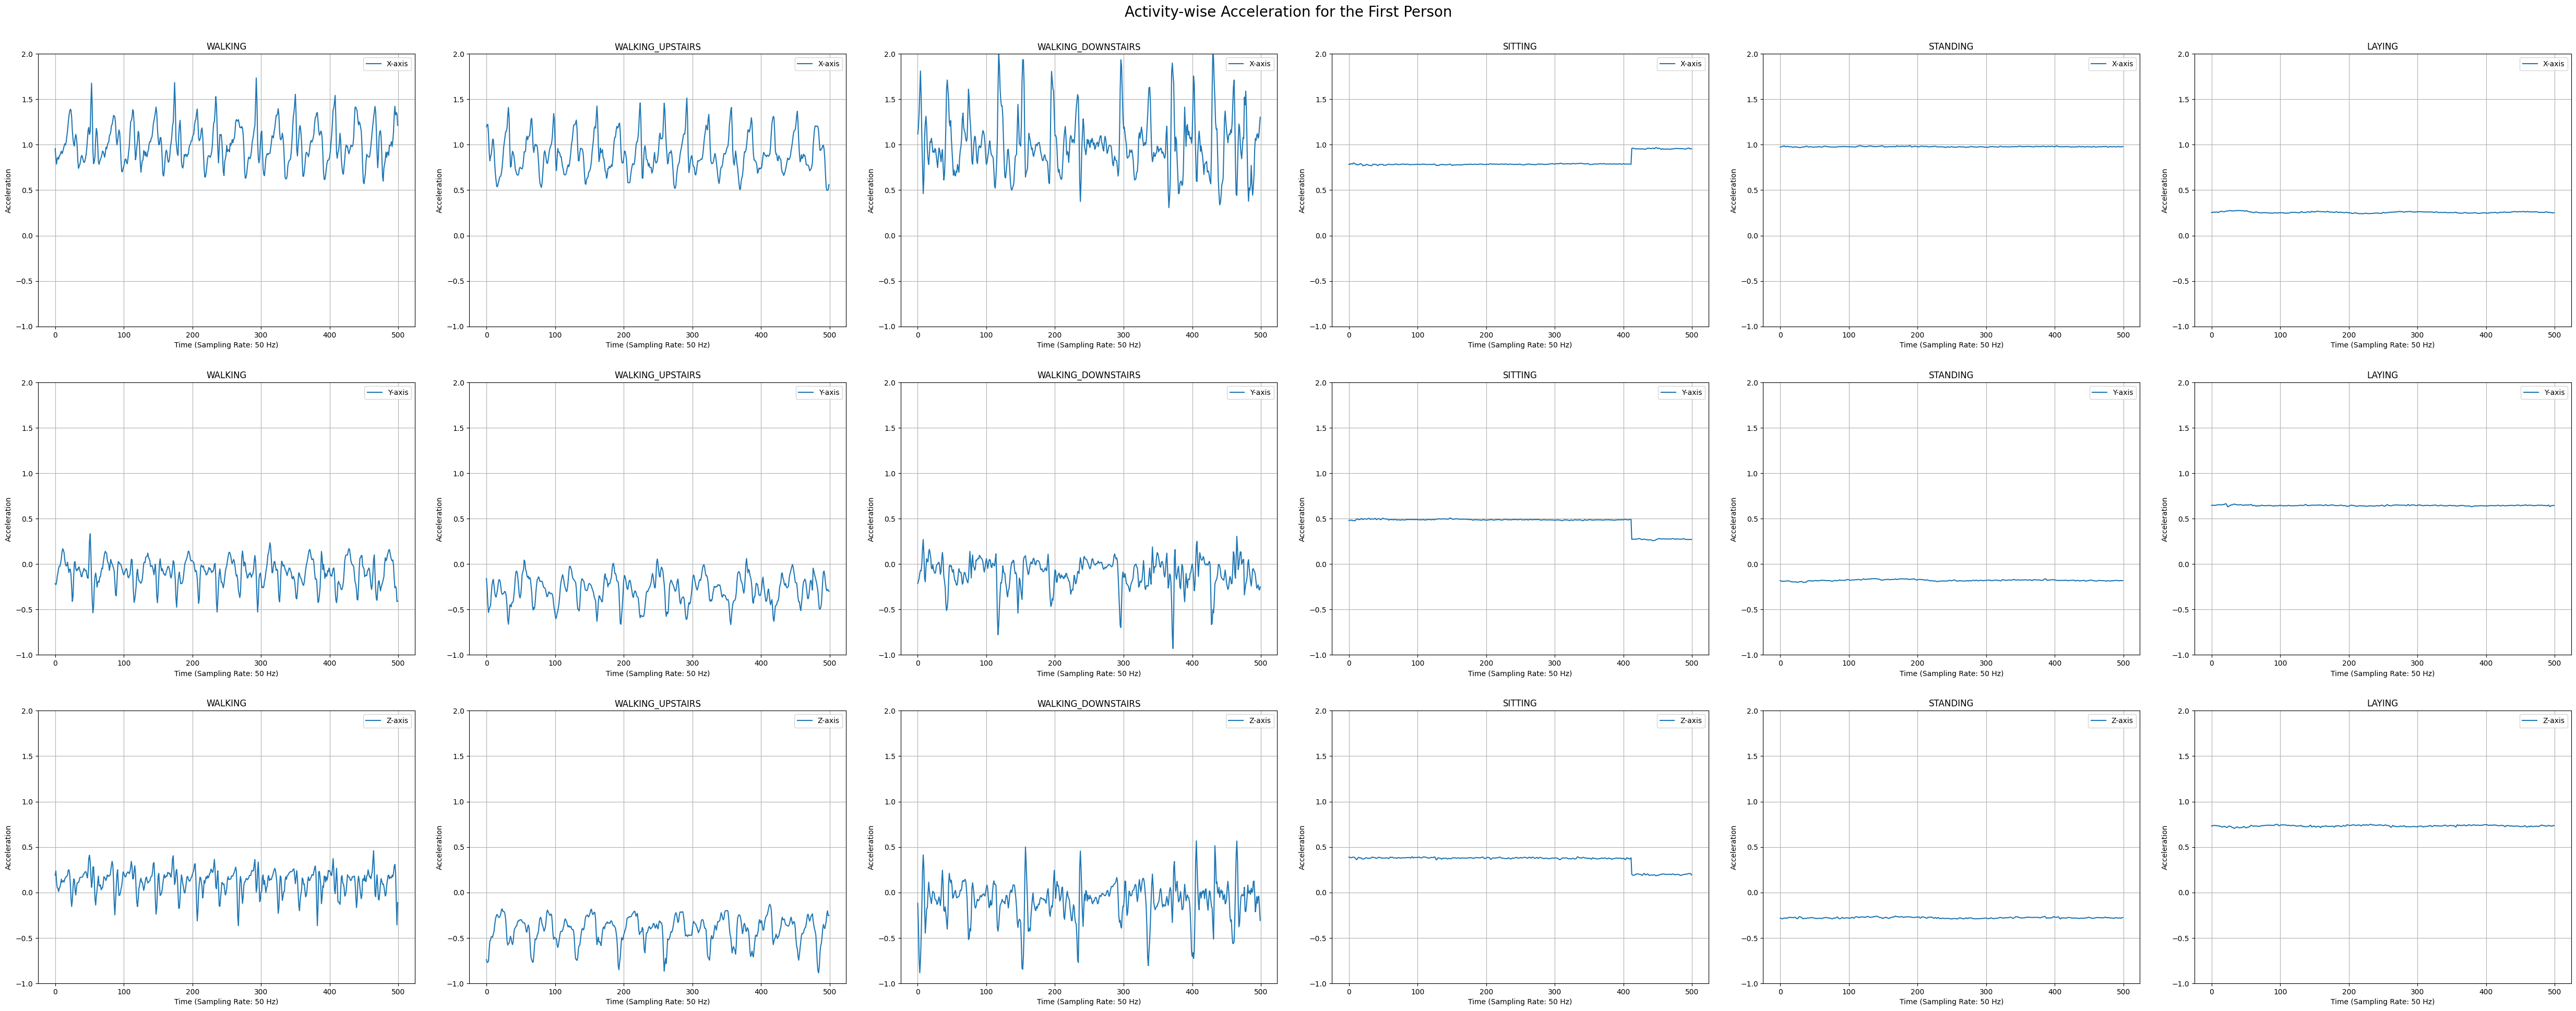

In [2]:
activity_map = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
directions = ["X-axis","Y-axis","Z-axis"]

standard_color = 'tab:blue'
fig, axes = plt.subplots(3, 6, figsize=(50,20))
fig.suptitle("Activity-wise Acceleration for the First Person", fontsize=20)

for activity, i in activity_map.items():
    acc_data = X_train[y_train==i]   # get the accelerometer data for the perticular activity
    acc_data_p1 = acc_data[0]        # get the accelerometer data for the first person
    


    for j, direction in enumerate(directions):
        axes[j,i-1].set_title(activity)
        axes[j,i-1].plot(acc_data_p1[:,j], label=direction)
        axes[j,i-1].legend()
        axes[j,i-1].set_xlabel("Time (Sampling Rate: 50 Hz)")
        axes[j,i-1].set_ylabel("Acceleration")
        axes[j,i-1].set_ylim(-1, 2) # setting y limit so that graphs are comparable for better visualization
        axes[j,i-1].grid()

plt.tight_layout(pad=3.0)
plt.show()

We can see that different activities show clear differences in their waveforms. The range of acceleration values and how often the peaks occur change depending on the activity.

For example, walking, walking upstairs, and walking downstairs have many peaks in their signals, while standing, sitting, and lying down have much smoother signals. This is because when a person is still, the acceleration does not change much. So, it’s easy to tell the difference between moving (dynamic) and not moving (static) activities just by looking at the graphs. But telling apart activities within the same group, like walking vs. walking upstairs, is harder.

If we use a decision tree directly on the raw time-series data, it may not work well. That’s because the tree looks at the acceleration at each time point as a separate feature. If the signal shifts in time, the values at each time point also change, and the tree could make the wrong prediction. Since decision trees don’t understand the order of data, they struggle with time-series signals.

A better approach is to convert the signals into features like average acceleration or standard deviation. These features make it easier for the model to separate activities. For example, the standard deviation can clearly tell apart static activities from dynamic ones. Still, some activities like walking and walking upstairs may remain difficult to separate, since both are dynamic and look similar.

**Q2)
Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration $$(acc_x^2 + acc_y^2 + acc_z^2)$$ for each activity and justify your answer. [0.5 marks]**


Training Data Shape (Linear Acc): (126, 500)
Testing Data Shape  (Linear Acc): (54, 500)
Showing linear acceleration for person 1


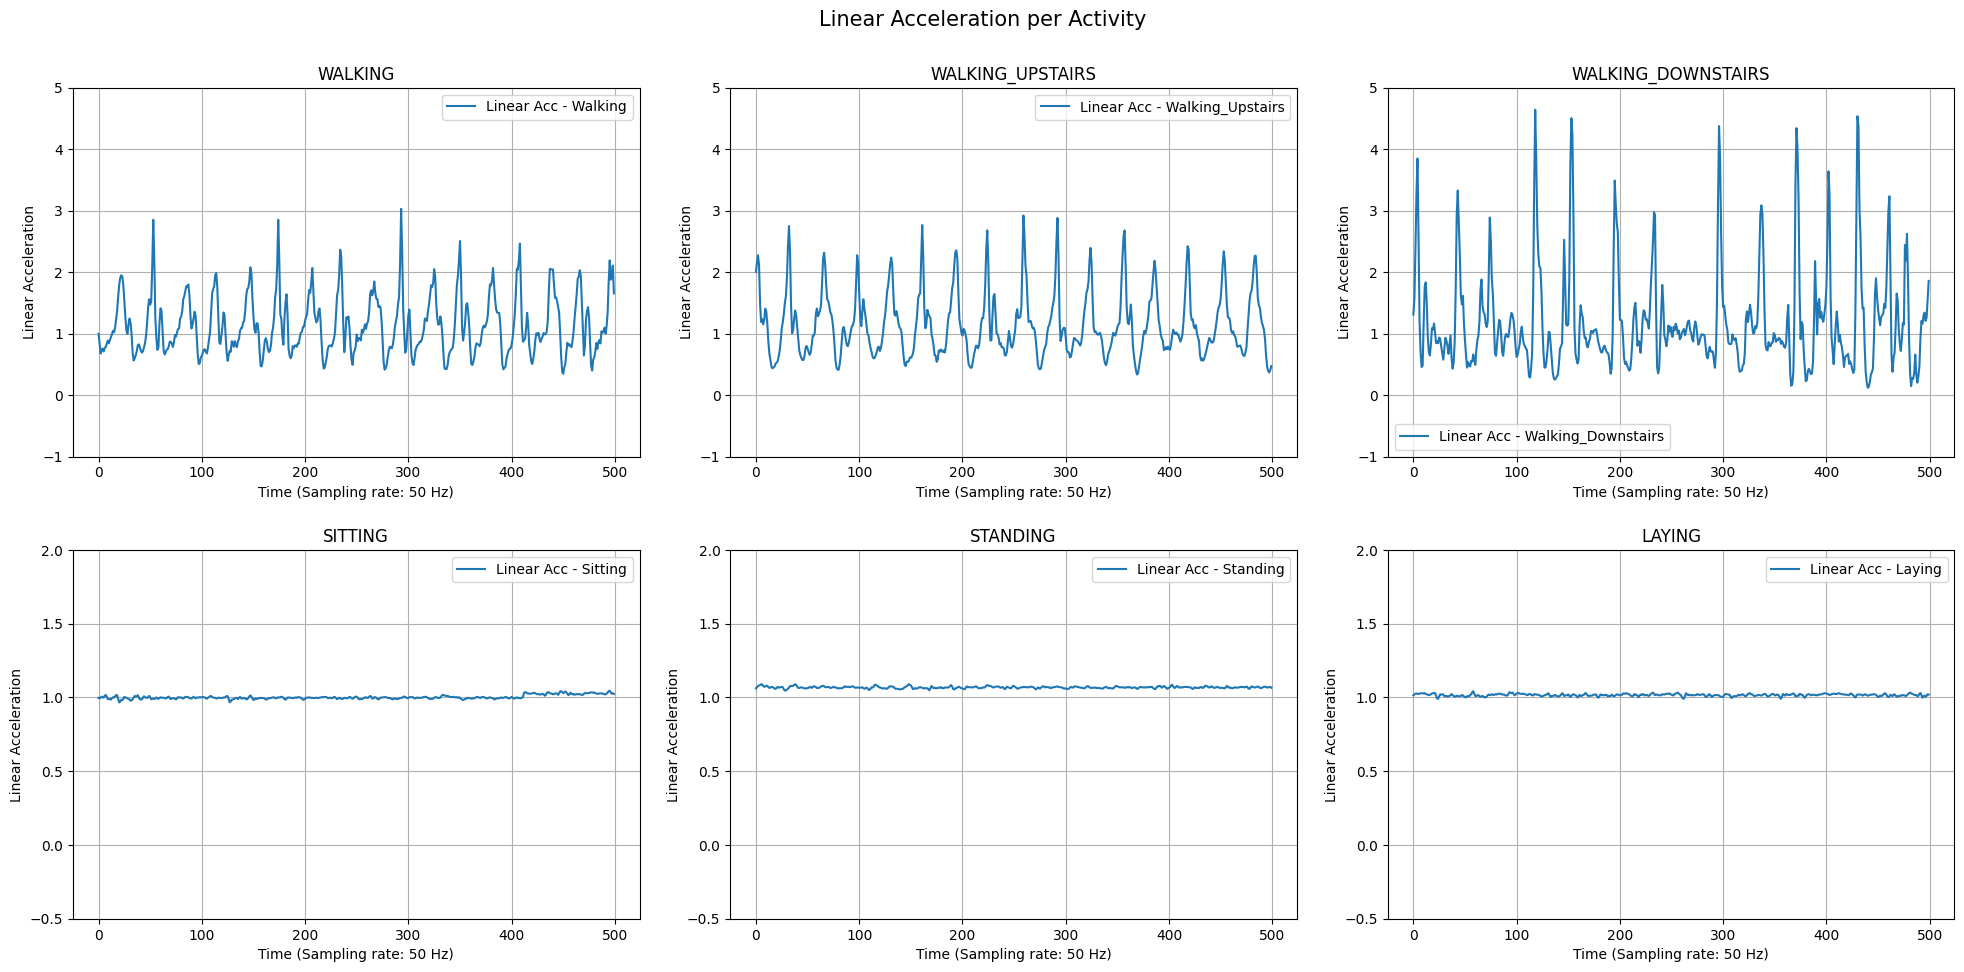

Showing linear acceleration for person 2


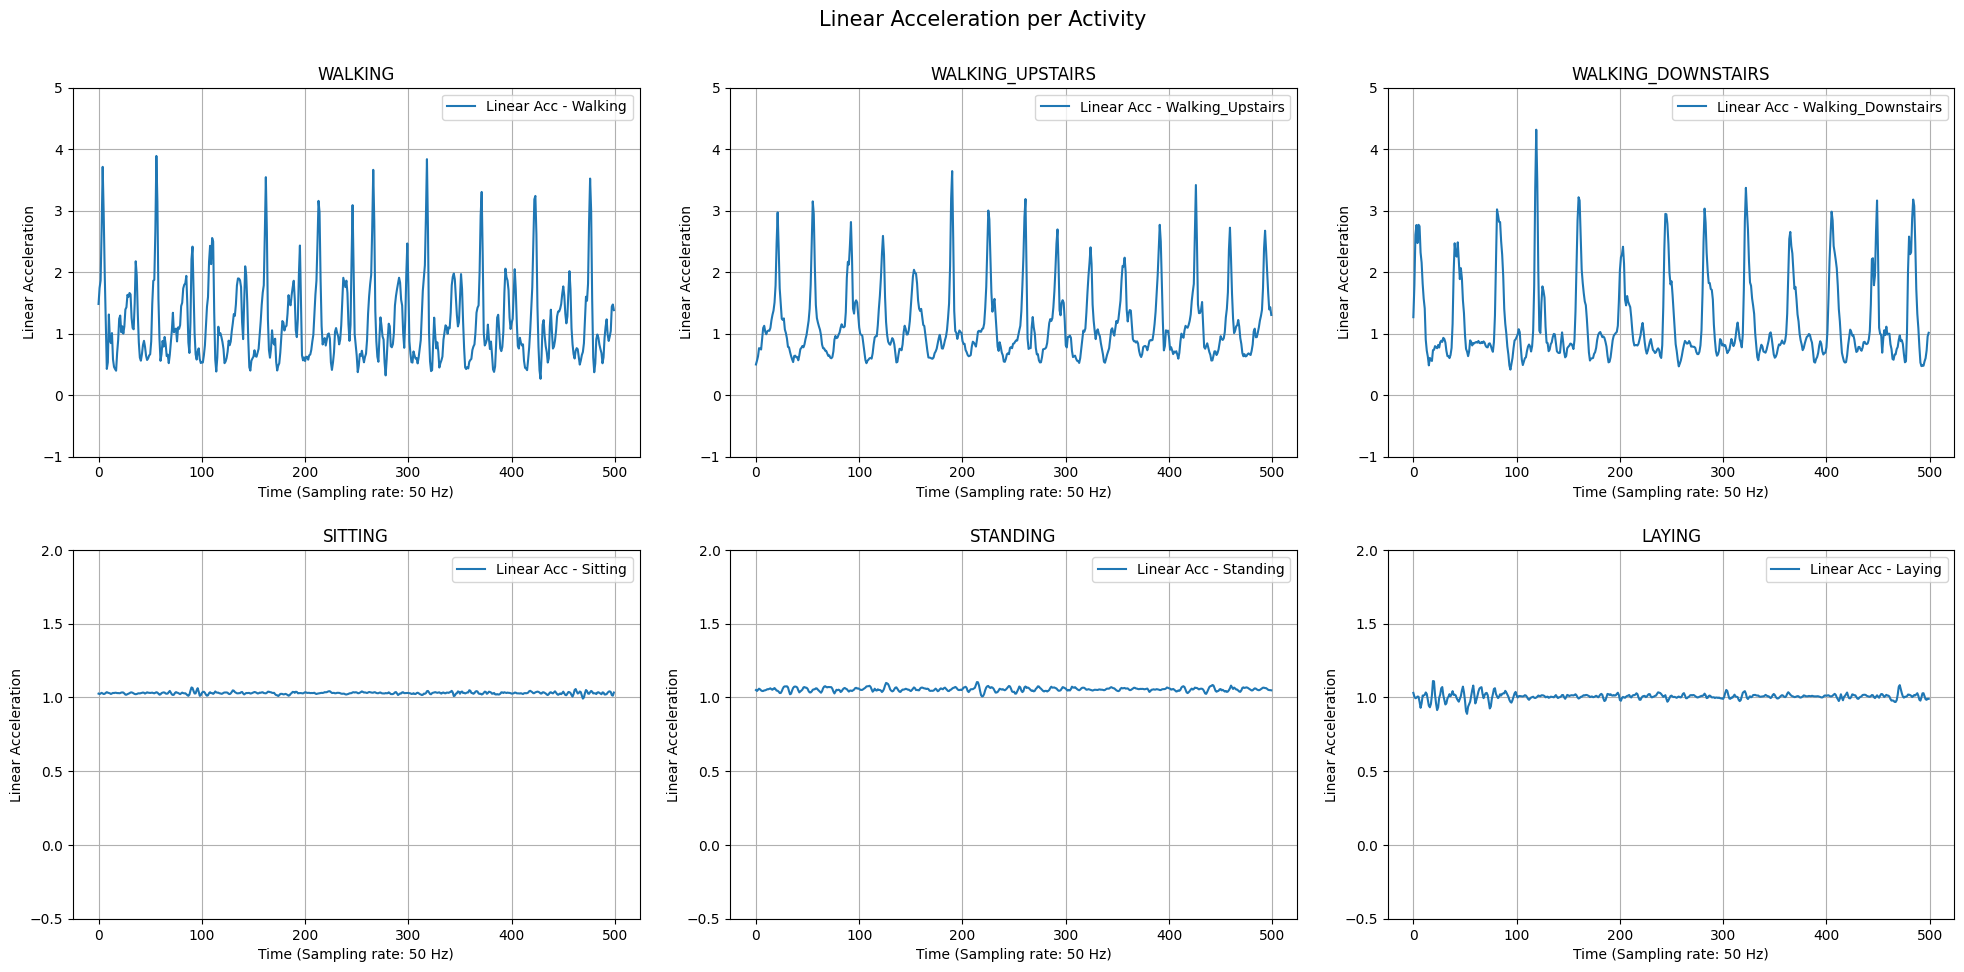

In [3]:
# Calculate linear acceleration
linear_acc_train = X_train[:, :, 0]**2 + X_train[:, :, 1]**2 + X_train[:, :, 2]**2
linear_acc_test  = X_test[:, :, 0]**2 + X_test[:, :, 1]**2 + X_test[:, :, 2]**2

print("Training Data Shape (Linear Acc):", linear_acc_train.shape)
print("Testing Data Shape  (Linear Acc):", linear_acc_test.shape)


# Function to plot linear acceleration

def plot_linear_acc(activity_classes, linear_acc_data, y_labels, subject_id):
    print("="*100)
    print(f"Showing linear acceleration for person {subject_id}")

    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle("Linear Acceleration per Activity", fontsize=15)
    axes = axes.flatten()

    for activity, ind in activity_classes.items():
        # Pick the signal of given subject for this activity
        acc_signal = linear_acc_data[y_labels == ind][subject_id - 1]

        ax = axes[ind - 1]
        ax.plot(acc_signal, label=f'Linear Acc - {activity.title()}')

        
        ax.set_title(activity)
        ax.set_xlabel("Time (Sampling rate: 50 Hz)")
        ax.set_ylabel("Linear Acceleration")

        # Different y-limits for dynamic vs static
        if ind < 4:   # walking, walking_upstairs, walking_downstairs
            ax.set_ylim(-1, 5)
        else:         # sitting, standing, laying
            ax.set_ylim(-0.5, 2)

        ax.legend()
        ax.grid()

    plt.tight_layout(pad=2.0)
    plt.show()



# Plot for two subjects
plot_linear_acc(activity_map, linear_acc_train, y_train, subject_id=1)
plot_linear_acc(activity_map, linear_acc_train, y_train, subject_id=2)


No, we do not need a machine learning model to differentiate between static and dynamic activities. From the linear acceleration plots we can see that, static activities (laying, sitting, standing) show very low and stable values, while dynamic activities (walking, walking upstairs, walking downstairs) have larger fluctuations and higher ranges. This clear separation means that static and dynamic activities can be distinguished directly without ML. However, if we want to further classify individual activities within each group (e.g., walking vs. walking upstairs, or sitting vs. standing), then a machine learning model would be necessary.

### Q3)
Visualize the data using **PCA** [1 mark].  

1. Use PCA (Principal Component Analysis) on **Total Acceleration**  $$(acc_x^2 + acc_y^2 + acc_z^2)$$ to compress the acceleration time-series into two features and plot a **scatter plot** to visualize different classes of activities.  


2. Next, use **TSFEL** (a featurizer library) to create features (choose the ones you feel are useful) and then perform PCA to obtain two features. Plot a **scatter plot** to visualize different classes of activities.  



3. Now, use the **features provided by the dataset** and perform PCA to obtain two features. Plot a **scatter plot** to visualize different classes of activities.  



4. **Compare** the results of PCA on  
   - Total Acceleration,  
   - TSFEL features, and  
   - Dataset features.  

Which method do you think is **better for visualizing the data**?


**Q 3.1)
Use PCA (Principal Component Analysis) on **Total Acceleration**  $$(acc_x^2 + acc_y^2 + acc_z^2)$$ to compress the acceleration time-series into two features and plot a **scatter plot** to visualize different classes of activities.**

Original shape: (126, 500)
After PCA shape: (126, 2)


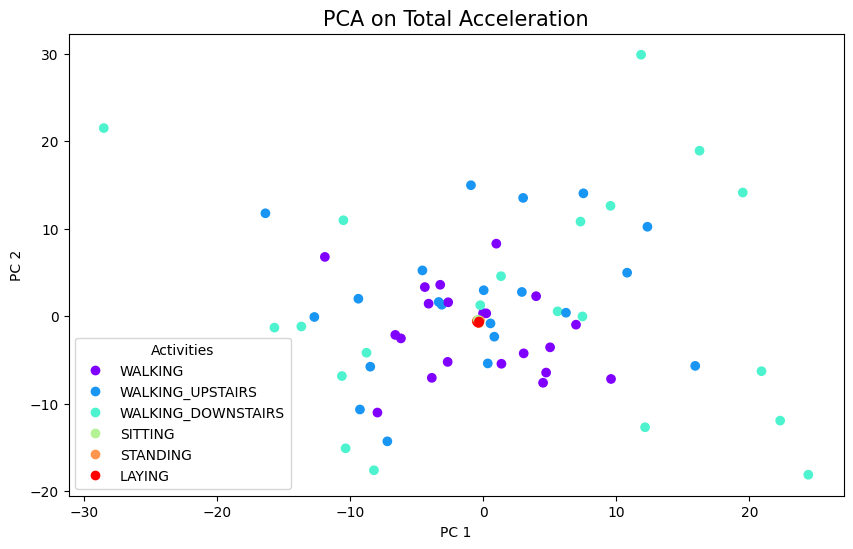

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the linear acceleration data
scaler = StandardScaler()
acc_train_scaled = scaler.fit_transform(linear_acc_train)

# Apply PCA with 2 components
pca_model = PCA(n_components=2)
acc_train_pca = pca_model.fit_transform(acc_train_scaled)

# Print shapes before and after PCA
print("Original shape:", linear_acc_train.shape)
print("After PCA shape:", acc_train_pca.shape)

# Scatter plot of the PCA results
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(
    acc_train_pca[:, 0], 
    acc_train_pca[:, 1], 
    c=y_train, 
    cmap='rainbow'
)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA on Total Acceleration", fontsize=15)

# Legend with activity labels
plt.legend(
    handles=scatter_plot.legend_elements()[0], 
    labels=activity_map.keys(), 
    title="Activities"
)
plt.show()



**Q 3.2)
Next, use **TSFEL** (a featurizer library) to create features (choose the ones you feel are useful) and then perform PCA to obtain two features. Plot a **scatter plot** to visualize different classes of activities.**

In [5]:
import tsfel

# Extract features using TSFEL
cfg = tsfel.get_features_by_domain()  # Get all features by default
X_train_tsfel = tsfel.time_series_features_extractor(cfg, X_train, verbose=1,fs =50,n_jobs=4)# extracts features from time series data
print("Shape of train data after performing feature creation using tsfel:",X_train_tsfel.shape)


Shape of train data after performing feature creation using tsfel: (126, 468)


In [6]:
X_test_tsfel = tsfel.time_series_features_extractor(cfg, X_test, verbose=1,fs =50,n_jobs=4)
print("Shape of test data after performing feature creation using tsfel:",X_test_tsfel.shape)
print(X_train_tsfel.columns)

Shape of test data after performing feature creation using tsfel: (54, 468)
Index(['0_Absolute energy', '0_Area under the curve', '0_Autocorrelation',
       '0_Average power', '0_Centroid', '0_ECDF Percentile Count_0',
       '0_ECDF Percentile Count_1', '0_ECDF Percentile_0',
       '0_ECDF Percentile_1', '0_ECDF_0',
       ...
       '2_Wavelet variance_1.39Hz', '2_Wavelet variance_1.56Hz',
       '2_Wavelet variance_1.79Hz', '2_Wavelet variance_12.5Hz',
       '2_Wavelet variance_2.08Hz', '2_Wavelet variance_2.5Hz',
       '2_Wavelet variance_3.12Hz', '2_Wavelet variance_4.17Hz',
       '2_Wavelet variance_6.25Hz', '2_Zero crossing rate'],
      dtype='object', length=468)


In [ ]:
X_train_tsfel.to_csv("../Datasets/TSFEL Data/X_train.csv", index=False)
X_test_tsfel.to_csv("../Datasets/TSFEL Data/X_test.csv", index=False)

print("Files saved as CSV.")

Train shape after correlation filter: (126, 264)
Test shape after correlation filter: (54, 264)

Train shape after low-variance filter: (126, 91)
Test shape after low-variance filter: (54, 91)

Final train shape after PCA: (126, 2)
Final test shape after PCA: (54, 2)


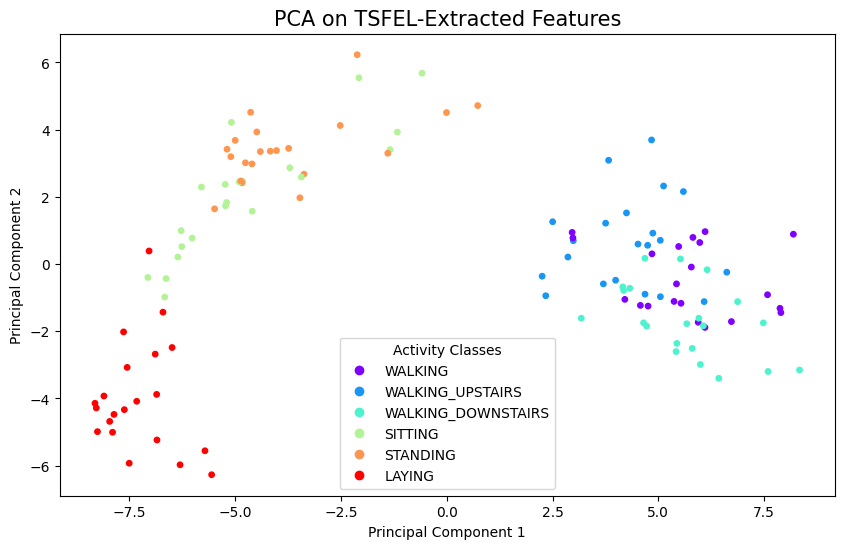

In [8]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Remove highly correlated features
redundant_features = tsfel.correlated_features(X_train_tsfel, threshold=0.95)
X_train_clean = X_train_tsfel.drop(redundant_features, axis=1)
X_test_clean = X_test_tsfel.drop(redundant_features, axis=1)

print("Train shape after correlation filter:", X_train_clean.shape)
print("Test shape after correlation filter:", X_test_clean.shape)

# Remove low variance features
var_filter = VarianceThreshold(threshold=0.1)
X_train_var = var_filter.fit_transform(X_train_clean)
X_test_var = var_filter.transform(X_test_clean)

print("\nTrain shape after low-variance filter:", X_train_var.shape)
print("Test shape after low-variance filter:", X_test_var.shape)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_var)
X_test_scaled = scaler.transform(X_test_var)

# Apply PCA
pca_model = PCA(n_components=2)
X_train_pca2 = pca_model.fit_transform(X_train_scaled)
X_test_pca2 = pca_model.transform(X_test_scaled)

print("\nFinal train shape after PCA:", X_train_pca2.shape)
print("Final test shape after PCA:", X_test_pca2.shape)

# Scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(X_train_pca2[:, 0], 
        X_train_pca2[:, 1], 
        c=y_train, 
        cmap='rainbow', 
        s=15)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on TSFEL-Extracted Features", fontsize=15)
plt.legend(handles=scatter_plot.legend_elements()[0], labels=activity_map.keys(), title="Activity Classes")
plt.show()


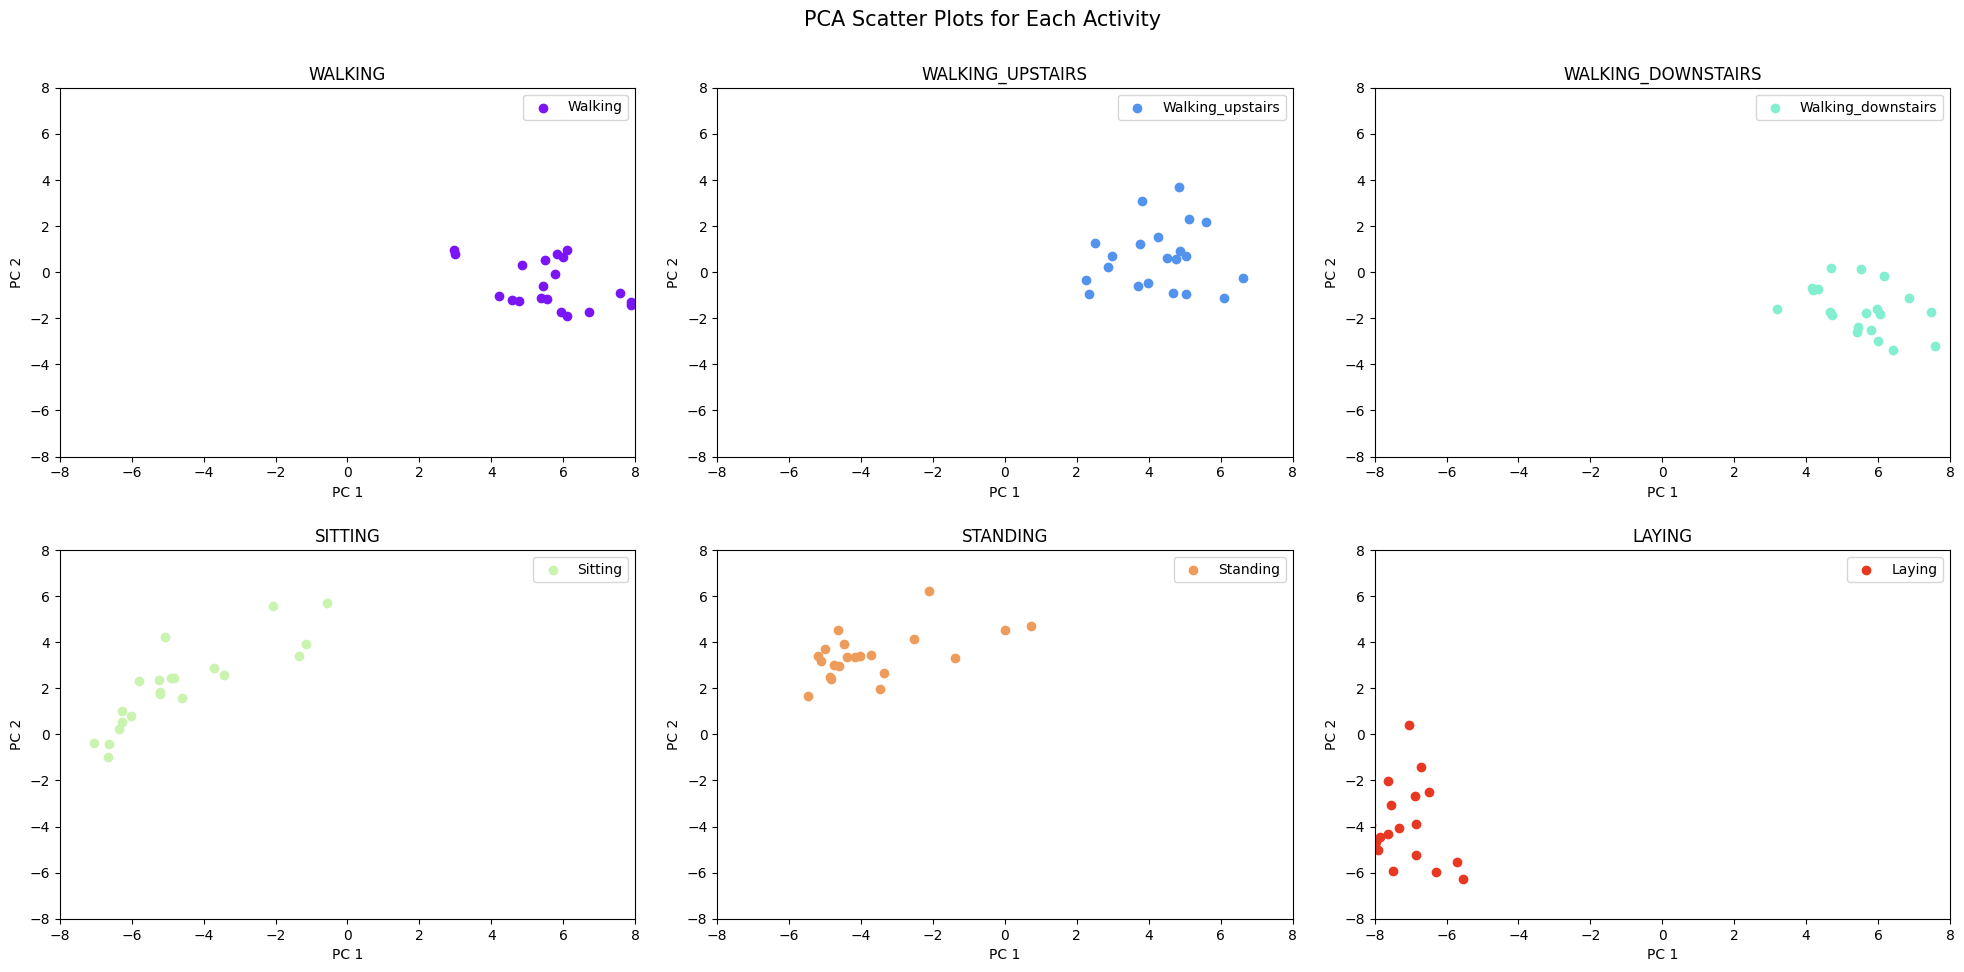

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,0.126617,-0.048363,0.012911,0.167375,-0.047331,0.157565,-0.066575,-0.116076,-0.136418,-0.029428,...,-0.143206,-0.132238,-0.103772,-0.074778,0.128956,-0.028100,0.130893,-0.035758,-0.007898,0.132212
1,0.204729,0.048383,0.052844,-0.062759,0.117588,-0.138866,0.195135,-0.021519,-0.011281,0.031932,...,-0.024955,-0.063505,-0.098537,-0.224261,-0.111094,0.054398,0.168247,0.190715,-0.088182,-0.076859


row 1 is first principal component and row 2 is second principal component


In [9]:
# Create subplots for each activity class
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle("PCA Scatter Plots for Each Activity", fontsize=15)
axs = axs.flatten()

palette = ['#7c15f6', '#5393ed', '#83efd0', '#cbf3b0', '#ee9c5c', '#e83821']

for act_name, act_id in activity_map.items():
    pca_subset = X_train_pca2[y_train == act_id]

    ax = axs[act_id - 1]
    ax.scatter(pca_subset[:, 0], pca_subset[:, 1], 
               c=palette[act_id - 1], label=f"{act_name.capitalize()}")
    ax.set_title(f"{act_name}")
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.legend()

plt.tight_layout(pad=2.0)
plt.show()

pca_components = pca_model.components_ # Get the PCA components

pca_components_df = pd.DataFrame(pca_components)


display(pca_components_df)
print("row 1 is first principal component and row 2 is second principal component")



**Q 3.3)
Now, use the **features provided by the dataset** and perform PCA to obtain two features. Plot a **scatter plot** to visualize different classes of activities.**

In [10]:
UCI_X_train = np.load('UCI_X_train.npy')
UCI_X_test = np.load('UCI_X_test.npy')
UCI_y_train = np.load('UCI_y_train.npy')
UCI_y_test = np.load('UCI_y_test.npy')


uci_scaler = StandardScaler()
uci_X_train_scaled = uci_scaler.fit_transform(UCI_X_train)
uci_X_test_scaled  = uci_scaler.transform(UCI_X_test)

uci_pca = PCA(n_components=2)
uci_X_train_pca = uci_pca.fit_transform(uci_X_train_scaled)
uci_X_test_pca  = uci_pca.transform(uci_X_test_scaled)

print("Training data shape: ",UCI_X_train.shape)
print("Training labels shape: ",UCI_y_train.shape)
print("Testing data shape: ",UCI_X_test.shape)
print("Testing labels shape: ",UCI_y_test.shape)
print("Training data shape after PCA:", uci_X_train_pca.shape)
print("Testing data shape after PCA:", uci_X_test_pca.shape)



Training data shape:  (7352, 561)
Training labels shape:  (7352, 1)
Testing data shape:  (2947, 561)
Testing labels shape:  (2947, 1)
Training data shape after PCA: (7352, 2)
Testing data shape after PCA: (2947, 2)


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.000028,-0.002473,-0.001527,0.056213,0.056788,0.054363,0.055969,0.056264,0.053886,0.055892,...,-0.005451,0.012324,0.010199,-0.001678,-0.001186,0.001014,-0.001582,-0.023100,0.029719,0.026622
1,0.015638,-0.000080,-0.004052,-0.011165,-0.025959,-0.031240,-0.009835,-0.028635,-0.035351,-0.010926,...,0.068717,-0.016957,-0.012832,-0.006337,-0.003623,0.012141,-0.008723,0.017476,-0.035213,-0.017278


row 1 is first principal component and row 2 is second principal component


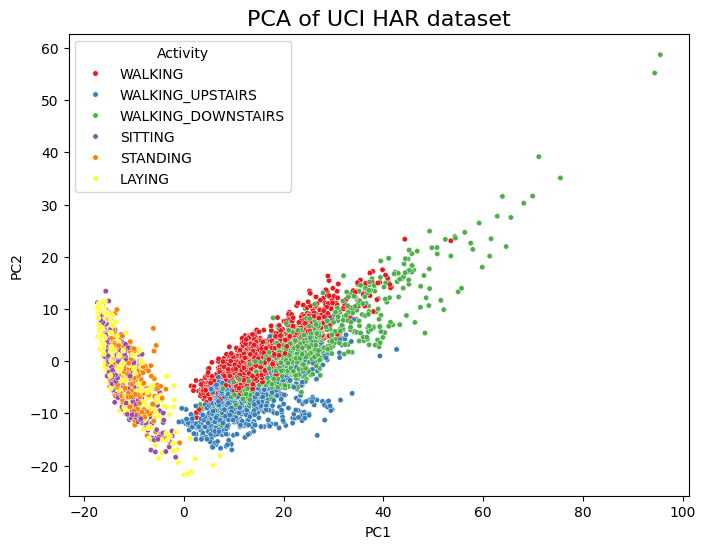

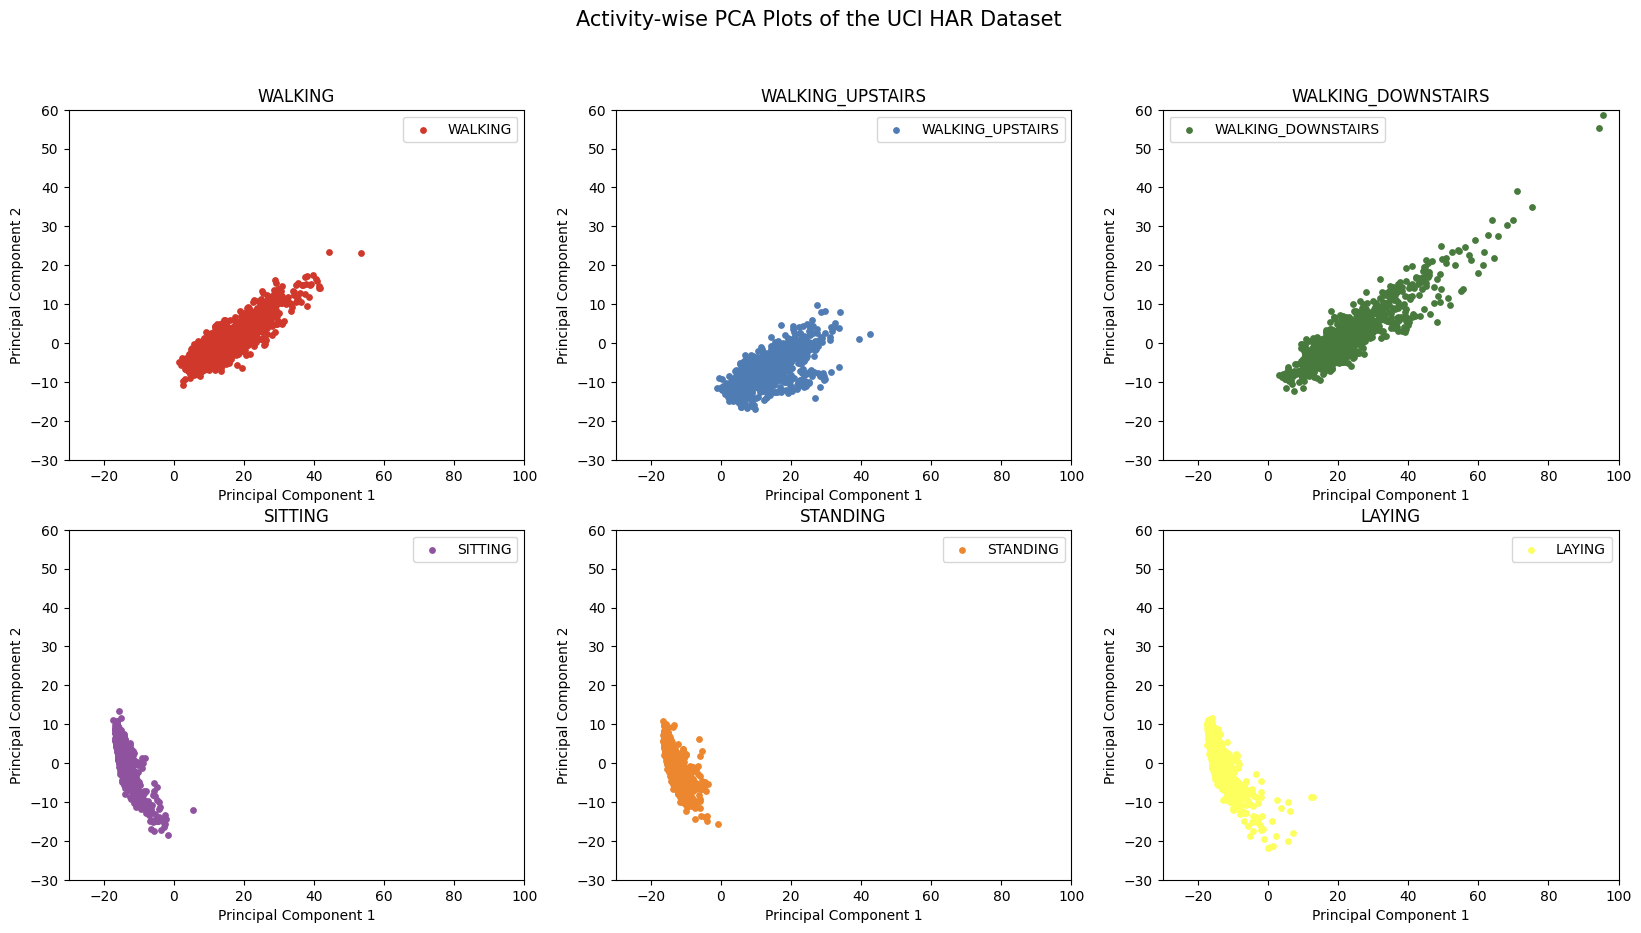

In [11]:
# Create DataFrame with PCA-transformed training data
uci_df_train = pd.DataFrame(uci_X_train_pca, columns=["PC1", "PC2"])
uci_df_train["Activity"] = UCI_y_train

# Map activity labels to descriptive names
uci_df_train["Activity"] = uci_df_train["Activity"].map({
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
})
# ploting
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Activity", data=uci_df_train, palette="Set1", hue_order=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"], s=15)
plt.title("PCA of UCI HAR dataset", fontsize=16)

# Plot each activity class separately after PCA
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle("Activity-wise PCA Plots of the UCI HAR Dataset", fontsize=15)
axes = axes.flatten()

activity_colors = ['#cf382a', '#507cb4', '#477a3c', '#8f529f', '#ec8730', '#fcff5e']

for activity_name, activity_idx in activity_map.items():
    # Extract PCA points for the given activity
    class_points = uci_df_train[uci_df_train["Activity"] == activity_name][["PC1", "PC2"]].values
    
    ax = axes[activity_idx - 1]
    ax.scatter(
        class_points[:, 0],
        class_points[:, 1],
        c=activity_colors[activity_idx - 1],
        label=activity_name,
        s=15
    )
    
    ax.set_title(activity_name)
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_xlim(-30, 100)
    ax.set_ylim(-30, 60)
    ax.legend()

# Extract PCA component loadings
uci_pca_components = uci_pca.components_

# Convert components into a DataFrame for easier inspection
uci_pca_df = pd.DataFrame(uci_pca_components)

display(uci_pca_df)
print("row 1 is first principal component and row 2 is second principal component")




**Q 3.4)
**Compare** the results of PCA on  
   - Total Acceleration,  
   - TSFEL features, and  
   - Dataset features.  

Which method do you think is **better for visualizing the data**?**

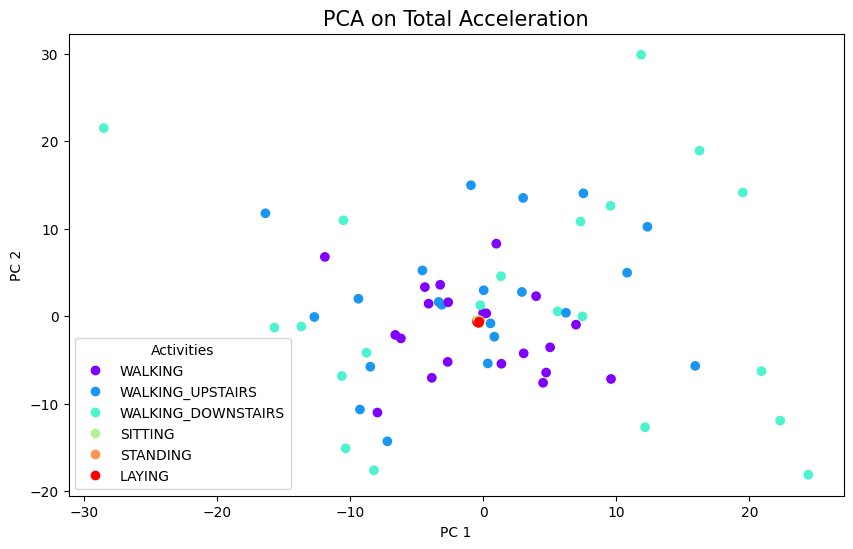
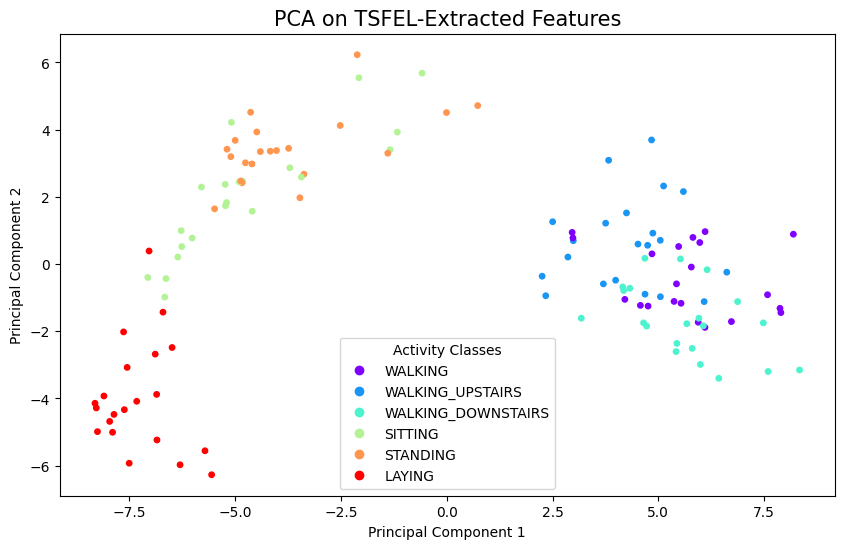
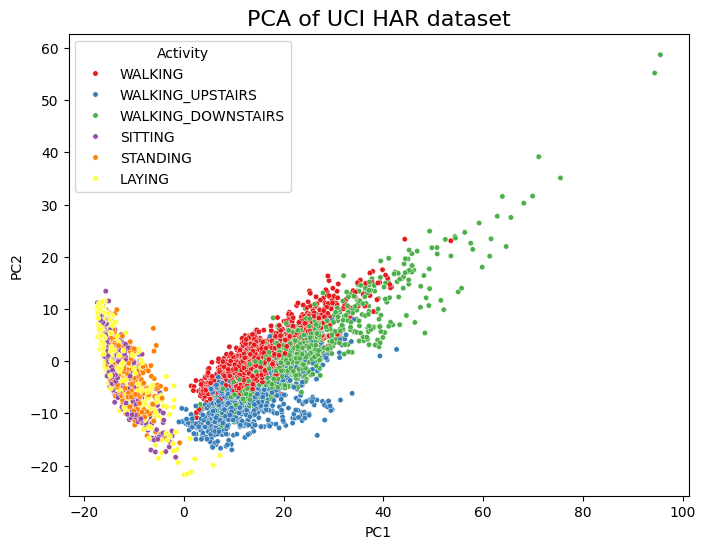

### 1) **Total Acceleration**

When applying PCA to the **Total Acceleration**, the scatter plot shows that the static activities 
(sitting, standing, lying) tend to accumulate close to the origin \((0,0)\).  
This occurs because their linear acceleration remains nearly constant, close to \(1g\), leaving little variation 
for PCA to spread out. As a result, these activities are projected into a compact cluster.  
On the other hand, the dynamic activities (walking, walking upstairs, walking downstairs) show a wider spread in 
the PCA plane, as their motion introduces greater variability across the acceleration axes.

---

### 2) **TSFEL-Based Features**

Using **features extracted with TSFEL**, PCA produces a clearer separation of the static classes.  
Since TSFEL incorporates diverse descriptors (e.g., statistical measures such as the mean on each axis), 
the model gains the ability to highlight subtle differences between activities like sitting, standing, and lying.  
The dynamic classes still overlap to some extent, but less so than with Total Acceleration alone.  
This suggests that TSFEL features capture more discriminative information, though they do not completely resolve 
the similarities among the walking-based activities.

---

### 3) **Original Feature Set**

PCA applied to the **original dataset features** also reveals a degree of separation between static and dynamic 
movements. However, the dynamic classes (walking, walking upstairs, walking downstairs) form clusters that 
largely overlap.  
This overlap may arise because the original variables are insufficient to fully characterize the subtle differences 
in the patterns of these three activities.

---

### **Conclusion**

- **Total Acceleration:** Static activities collapse near the origin, while dynamic activities disperse without forming 
clear groups.  
- **TSFEL Features:** Provide the most distinct clusters for static activities and partially separate the dynamic ones.  
- **Original Features:** Distinguish static vs. dynamic activities, but dynamic classes remain heavily mixed.  

**Overall, TSFEL features give the clearest representation, offering sharper boundaries between static 
and dynamic activities while still showing partial overlaps among dynamic classes.**


**Q4)
Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? [1 marks]**


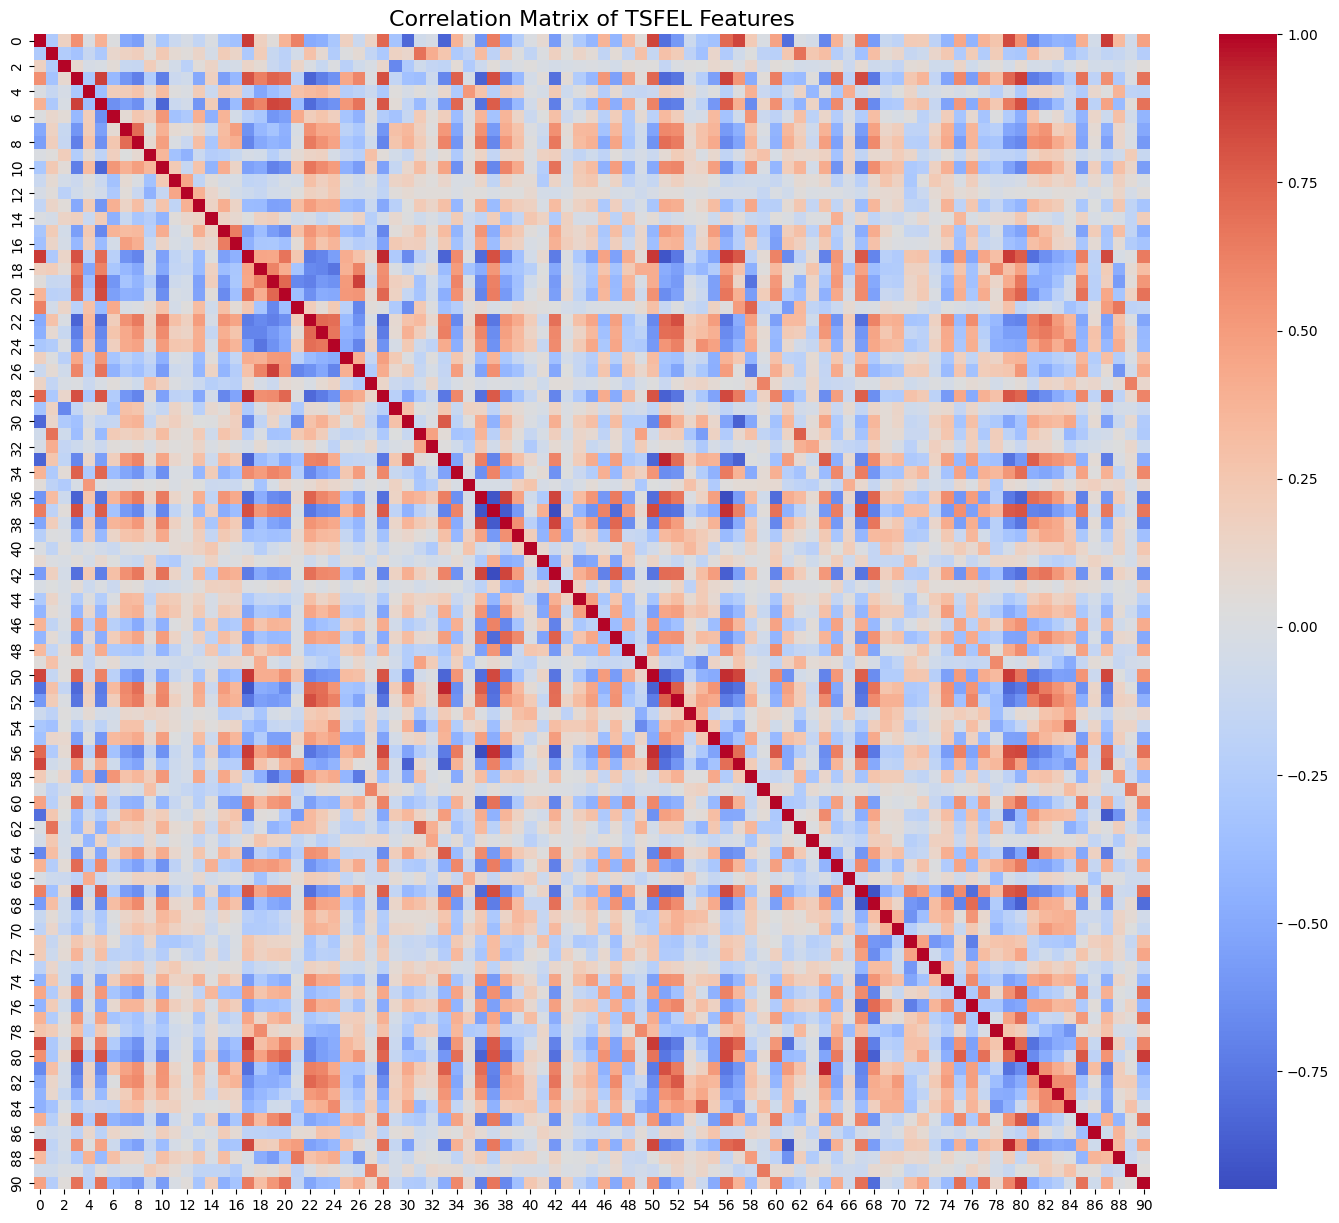

Number of highly correlated features: 18
Highly correlated features: {68, 5, 37, 38, 90, 42, 79, 80, 17, 50, 19, 51, 81, 87, 56, 57, 26, 28}


In [12]:
# Convert to DataFrame
tsfel_corr_features = pd.DataFrame(X_train_var)

# Compute correlation matrix
tsfel_corr_matrix = tsfel_corr_features.corr()

# Plot correlation heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(tsfel_corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix of TSFEL Features", fontsize=16)
plt.show()

# Identify highly correlated features
corr_threshold = 0.85
tsfel_high_corr_features = set()

for i in range(len(tsfel_corr_matrix.columns)):
    for j in range(i):
        if abs(tsfel_corr_matrix.iloc[i, j]) > corr_threshold:
            colname = tsfel_corr_matrix.columns[i]
            tsfel_high_corr_features.add(colname)

print("Number of highly correlated features:", len(tsfel_high_corr_features))
print("Highly correlated features:", tsfel_high_corr_features)


Number of Features: 561


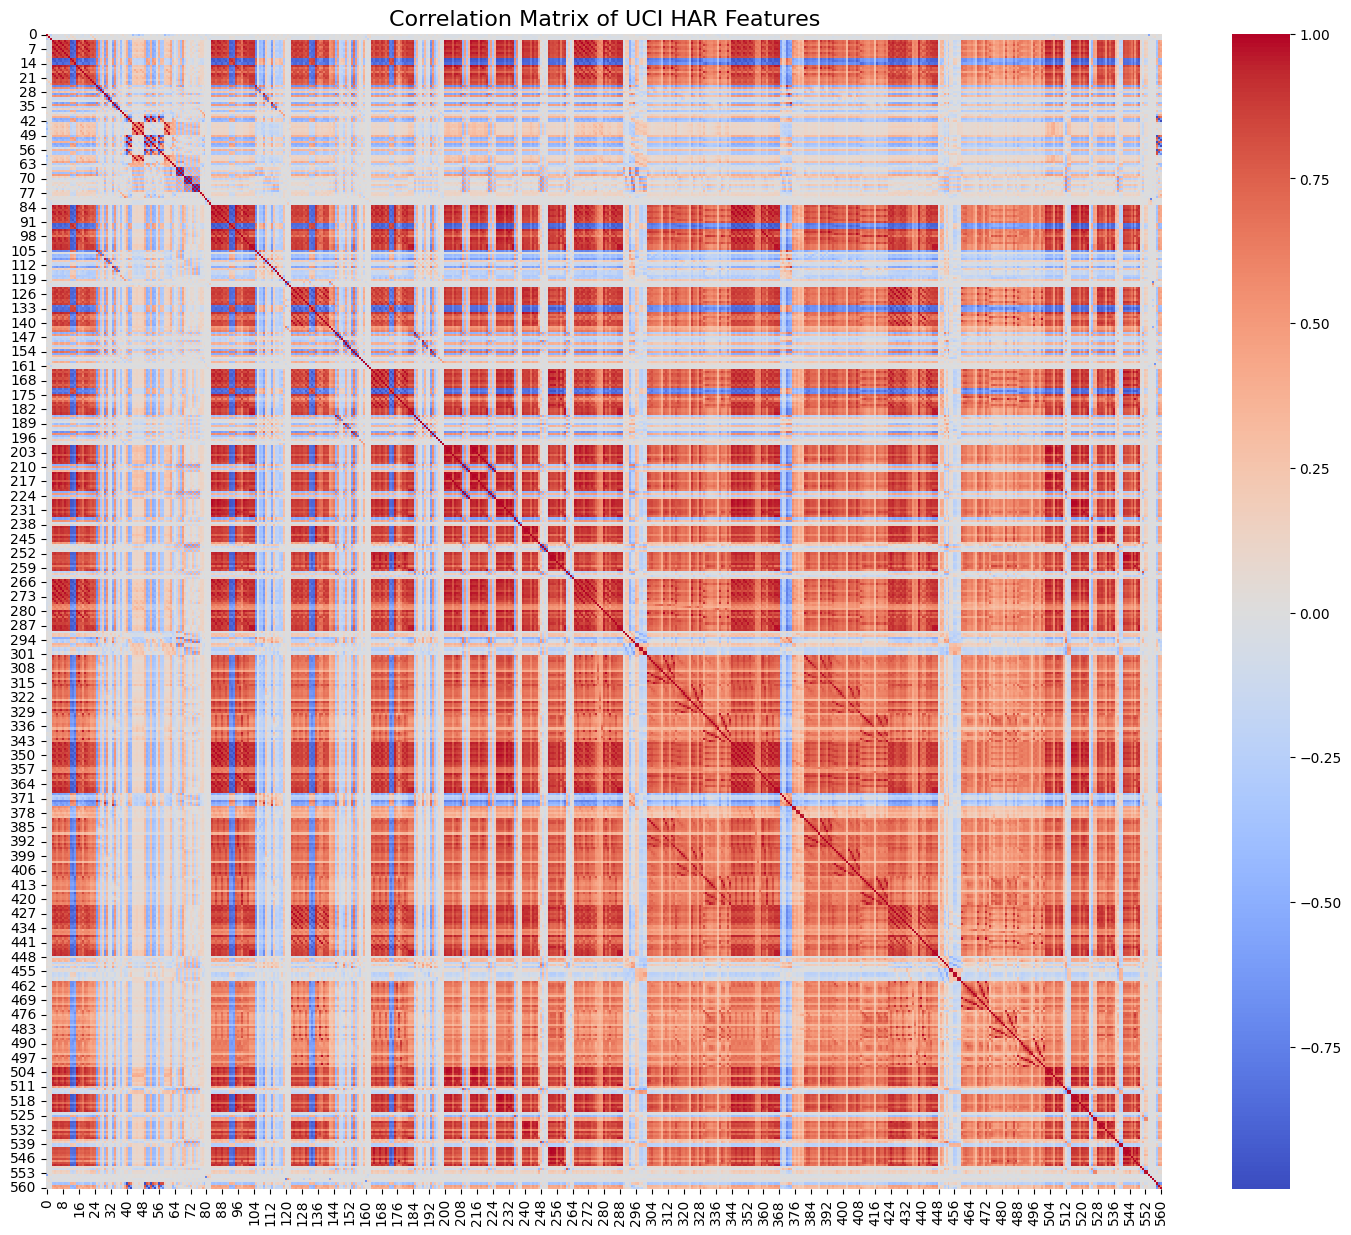

Number of highly correlated features: 323
Highly correlated features: {'fBodyAcc-kurtosis()-X', 'tBodyAcc-std()-Y', 'fBodyAcc-bandsEnergy()-1,8', 'fBodyAccJerk-bandsEnergy()-25,48', 'tBodyGyroJerkMag-std()', 'fBodyGyro-mean()-Y', 'tBodyAcc-std()-Z', 'tGravityAcc-min()-Y', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAccMag-kurtosis()', 'tBodyGyro-std()-Z', 'fBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAccJerk-energy()-Y', 'tBodyGyro-mad()-Z', 'tGravityAccMag-min()', 'fBodyBodyGyroJerkMag-std()', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyAccJerk-sma()', 'fBodyAcc-bandsEnergy()-41,48', 'tBodyAccJerk-mad()-Z', 'fBodyGyro-iqr()-X', 'tBodyGyroMag-max()', 'tBodyGyroMag-mad()', 'tBodyGyro-std()-Y', 'fBodyAcc-bandsEnergy()-57,64', 'tBodyAcc-arCoeff()-Z,2', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-std()-Y', 'fBodyAcc-bandsEnergy()-33,48', 'tBodyAccMag-arCoeff()2', 'fBodyAcc-entropy()-X', 'fBodyAcc-entropy()-Z', 'tBodyAccJerk-entropy()-X', 'tBodyGyroJerk-std()-Y', 'fBodyGyro-bandsEnergy()-17,24', 'fBodyAcc

In [13]:
# Load UCI HAR feature names
uci_feature_names = []
with open('../Datasets/UCI HAR Dataset/features.txt') as f:
    uci_feature_names = [line.split()[1] for line in f.readlines()]

print(f"Number of Features: {len(uci_feature_names)}")

# Convert training set into DataFrame
uci_X_train_df = pd.DataFrame(UCI_X_train)

# Compute correlation matrix
uci_corr_matrix = uci_X_train_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(uci_corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix of UCI HAR Features", fontsize=16)
plt.show()

# Threshold for high correlation
corr_threshold = 0.85
uci_high_corr_features = set()

# Identify highly correlated features
for i in range(len(uci_corr_matrix.columns)):
    for j in range(i):
        if abs(uci_corr_matrix.iloc[i, j]) > corr_threshold:
            feature_name = uci_feature_names[i]
            uci_high_corr_features.add(feature_name)

# Print results
print("Number of highly correlated features:", len(uci_high_corr_features))
print("Highly correlated features:", uci_high_corr_features)
